In [ ]:

from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/analysis/OnlineRetail.csv'


import pandas as pd
data = pd.read_csv(file_path, encoding='latin1')

Mounted at /content/drive


In [ ]:
#  data_cleaned حذف الصفوف التي تحتوي على أي قيمة مفقودة و خزنتها فمتغير
data_cleaned = data.dropna()

# عرض عدد الصفوف بعد الحذف
print(f"عدد الصفوف بعد حذف القيم المفقودة: {len(data_cleaned)}")

# drop duplicate
data.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


عدد الصفوف بعد حذف القيم المفقودة: 171206


In [ ]:
# Assuming 'data' is your DataFrame, and 'InvoiceDate' is the column with dates
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')

# Add 'year', 'month', 'day', and 'day_name' columns
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.day
data['day_name'] = data['InvoiceDate'].dt.day_name()

# Display the updated DataFrame
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country    year  month  \
0 2010-01-12 08:26:00       2.55     17850.0  United Kingdom  2010.0    1.0   
1 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0    1.0   
2 2010-01-12 08:26:00       2.75     17850.0  United Kingdom  2010.0    1.0   
3 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0    1.0   
4 2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0    1.0   

    day day_name  
0  12.0  Tuesday  
1  12.0  Tuesday  
2  12.0  Tuesday  
3  12.0  Tuesday

In [ ]:
# Grouping by CustomerID, InvoiceDate, and Description, and counting the items
item_count = data.groupby(['CustomerID', 'InvoiceDate', 'Description'])['Description'].count().reset_index(name='Count')

# Displaying the first 10 rows of the resulting DataFrame
item_count.head(10)

,CustomerID,InvoiceDate,Description,Count
0,12347.0,2010-07-12 14:57:00,3D DOG PICTURE PLAYING CARDS,1
1,12347.0,2010-07-12 14:57:00,AIRLINE BAG VINTAGE JET SET BROWN,1
2,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE CHOCOLATE,1
3,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE GREEN,1
4,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE ORANGE,1
5,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE PINK,1
6,12347.0,2010-07-12 14:57:00,ALARM CLOCK BAKELIKE RED,1
7,12347.0,2010-07-12 14:57:00,BATHROOM METAL SIGN,1
8,12347.0,2010-07-12 14:57:00,BLACK CANDELABRA T-LIGHT HOLDER,1
9,12347.0,2010-07-12 14:57:00,BLACK EAR MUFF HEADPHONES,1


In [ ]:
import pandas as pd

# إنشاء الجدول المحوري بناءً على البيانات
item_count_pivot = data.pivot_table(index='InvoiceNo',
                                    columns='Description',
                                    values='Quantity',
                                    aggfunc='sum').fillna(0)

# عرض الجدول المحوري داخل DataFrame
item_count_pivot.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# drop comma
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head(10)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


data = pd.read_csv('/content/drive/MyDrive/OnlineRetail.csv', encoding='latin1')


basket = data.groupby('InvoiceNo')['Description'].apply(list).reset_index()

# ترميز العناصر باستخدام get_dummies لتشكيل مصفوفة 0 و 1
basket_encoded = basket['Description'].str.join('|').str.get_dummies('|')

# عرض أول 5 صفوف في DataFrame
basket_encoded.head(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from google.colab import drive


drive.mount('/content/drive')


data = pd.read_csv('/content/drive/MyDrive/OnlineRetail.csv', encoding='latin1')

# تنظيف البيانات من القيم المفقودة
data_cleaned = data.dropna(subset=['InvoiceNo', 'Description', 'Quantity'])

# تحويل البيانات إلى صيغة السلة (Basket Format)
basket = data_cleaned.groupby('InvoiceNo')['Description'].apply(list).reset_index()

# ترميز العناصر باستخدام get_dummies لتشكيل مصفوفة 0 و 1
basket_encoded = basket['Description'].str.join('|').str.get_dummies('|')

# تطبيق FP-Growth على البيانات المرمزة
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# فرز العناصر المتكررة حسب الدعم (support) وعرض أعلى 10 نتائج
frequent_itemsets.sort_values('support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.094329,(WHITE HANGING HEART T-LIGHT HOLDER)
268,0.088879,(REGENCY CAKESTAND 3 TIER)
89,0.087486,(JUMBO BAG RED RETROSPOT)
470,0.069907,(PARTY BUNTING)
40,0.065850,(LUNCH BAG RED RETROSPOT)
7,0.060113,(ASSORTED COLOUR BIRD ORNAMENT)
493,0.059744,(SET OF 3 CAKE TINS PANTRY DESIGN )
41,0.054663,(PACK OF 72 RETROSPOT CAKE CASES)
160,0.053065,(LUNCH BAG BLACK SKULL.)
76,0.051877,(NATURAL SLATE HEART CHALKBOARD )


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# تطبيق FP-Growth على البيانات المرمزة (basket_encoded) باستخدام حد أدنى للدعم 0.01
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# استخراج قواعد الارتباط باستخدام association_rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# عرض القواعد مع الأعمدة المطلوبة
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)

# تنسيق الأعمدة وجعل المخرجات تظهر بالشكل المناسب
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# عرض النتائج في شكل DataFrame باستخدام display
import pandas as pd
from IPython.display import display


display(top_rules)





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
1435,"REGENCY TEA PLATE ROSES , REGENCY TEA PLATE PINK",REGENCY TEA PLATE GREEN,0.010572,0.948529,59.968683
1436,"REGENCY TEA PLATE GREEN , REGENCY TEA PLATE PINK",REGENCY TEA PLATE ROSES,0.010572,0.914894,48.855720
226,"CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK ...",RED RETROSPOT CHARLOTTE BAG,0.010121,0.904762,21.028390
1133,"REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP ...",GREEN REGENCY TEACUP AND SAUCER,0.012416,0.899110,20.758633
1431,REGENCY TEA PLATE PINK,REGENCY TEA PLATE GREEN,0.011555,0.898089,56.779710
396,"SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETROS...",SET/6 RED SPOTTY PAPER PLATES,0.010859,0.895270,41.457639
1147,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",GREEN REGENCY TEACUP AND SAUCER,0.022496,0.894137,20.643817
1048,"SUKI SHOULDER BAG, JUMBO BAG RED RETROSPOT",DOTCOM POSTAGE,0.010203,0.882979,30.392402
1134,"REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACUP...",ROSES REGENCY TEACUP AND SAUCER,0.012416,0.875723,19.081369
315,"JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG P...",JUMBO BAG RED RETROSPOT,0.011023,0.867742,9.918676


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


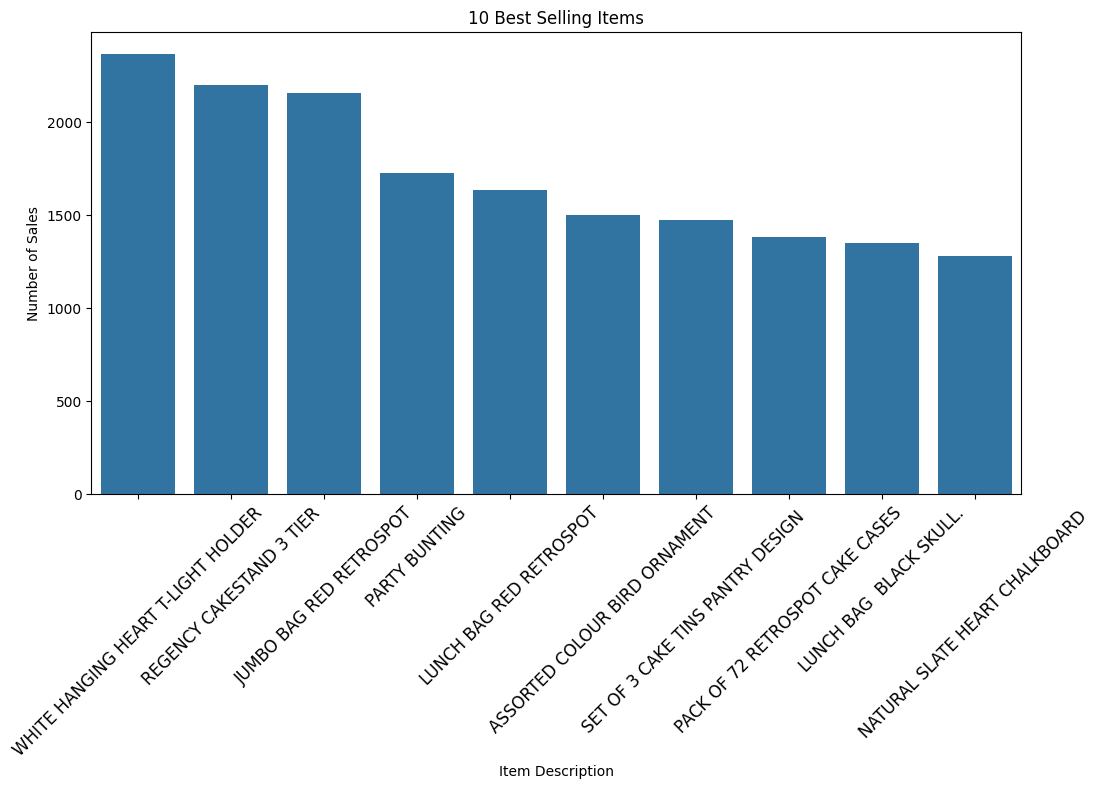

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 10 best-selling items
plt.figure(figsize=(12,6))

# Adjust column name to 'Description' if necessary
sns.barplot(x=data['Description'].value_counts()[:10].index,
            y=data['Description'].value_counts()[:10].values)

# Customize the plot
plt.xticks(size=12, rotation=45)
plt.title('10 Best Selling Items')
plt.xlabel('Item Description')
plt.ylabel('Number of Sales')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


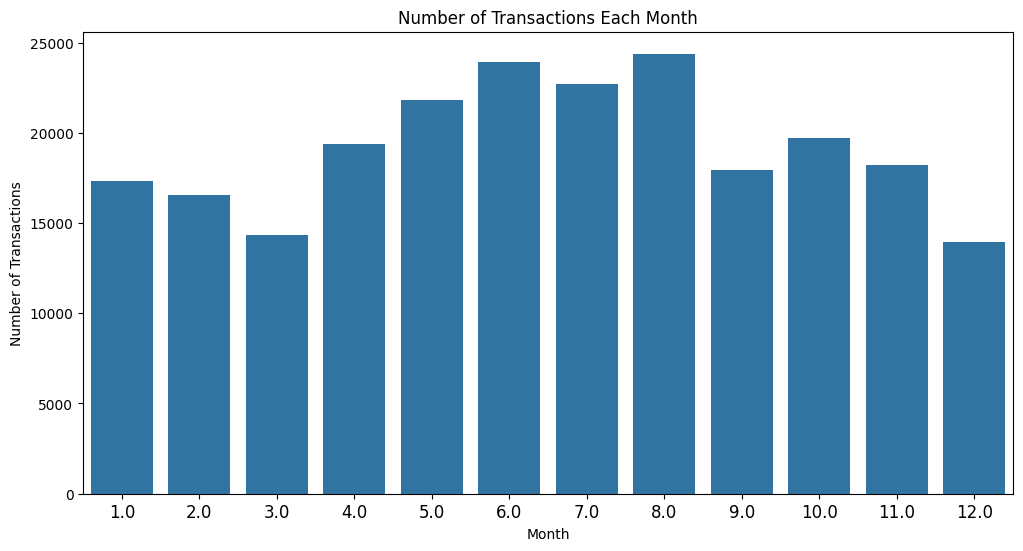

In [ ]:
# Assuming 'data' is your DataFrame, and 'InvoiceDate' is the column with dates
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')

# Add 'year', 'month', 'day', and 'day_name' columns
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.day
data['day_name'] = data['InvoiceDate'].dt.day_name()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Plotting the number of transactions per month
sns.barplot(x=data['month'].value_counts().index,
            y=data['month'].value_counts().values)

# Customize the plot
plt.xticks(size=12)
plt.title('Number of Transactions Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


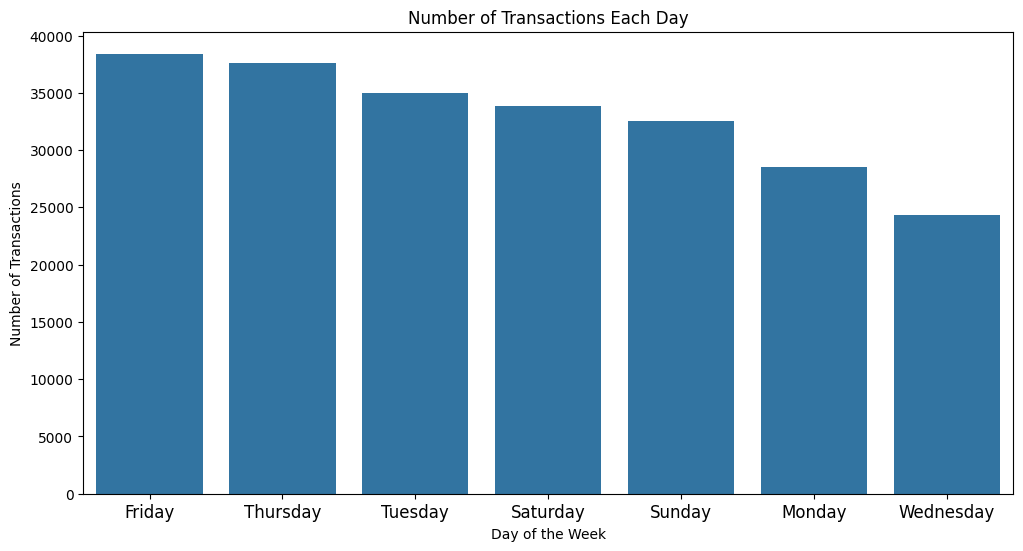

In [ ]:
# Assuming 'day_name' column has already been created in your DataFrame (from previous datetime operations)
plt.figure(figsize=(12,6))

# Plotting the number of transactions per day
sns.barplot(x=data['day_name'].value_counts().index,
            y=data['day_name'].value_counts().values)

# Customize the plot
plt.xticks(size=12)
plt.title('Number of Transactions Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='day_name'>

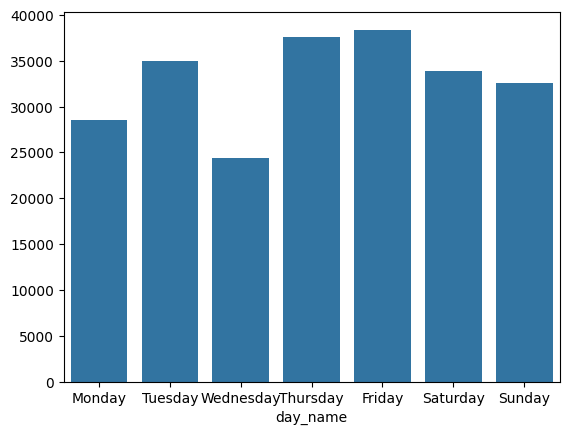

In [ ]:
# Sorting days by the correct weekday order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=data['day_name'].value_counts().reindex(order).index,
            y=data['day_name'].value_counts().reindex(order).values)